In [1]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' #Include this to avoid kernel from dying when using matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import splitfolders

# Augment images
from PIL import Image
from torchvision import transforms
from torchvision.utils import save_image

In [2]:
DATA_DIR = "../data/refractive error/dataset/"
img_data = {}

for folder in os.listdir(DATA_DIR):
    img_path = DATA_DIR + folder + '/'
    img_data[folder] = [img_path + img for img in os.listdir(img_path)]

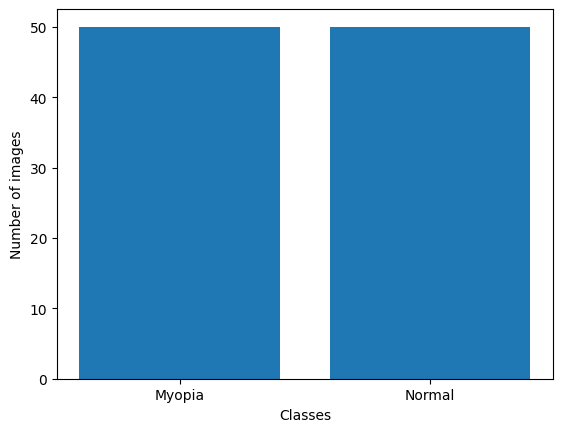

In [3]:
num_img = [len(v) for k,v in img_data.items()]
plt.bar(img_data.keys(), num_img)
plt.ylabel('Number of images')
plt.xlabel('Classes')
plt.show()

In [4]:
OUTPUT_DIR = "../data/refractive error/split non-augmented dataset/"

splitfolders.fixed(
            DATA_DIR,
            output=OUTPUT_DIR,
            seed=1335,
            fixed=(8, 7), #8 for validation, 7 for test, and the rest (35) for training
        )

Copying files: 100 files [00:00, 364.42 files/s]


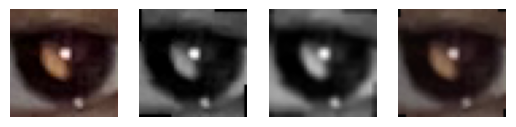

In [5]:
image_transforms = transforms.Compose(
    [
        transforms.RandomRotation(10),
        # transforms.RandomHorizontalFlip(0.5),
        # transforms.RandomVerticalFlip(0.5), 
        transforms.RandomGrayscale(0.5),
        transforms.RandomAdjustSharpness(0.5),
        transforms.ColorJitter(0.4, 0.4, 0.4),
        transforms.GaussianBlur(3),
        transforms.ToTensor()
    ]
)

img = Image.open(img_data['Myopia'][0])
fig, axarr = plt.subplots(1,4)
aug_test = [image_transforms(img).permute(1, 2, 0) for i in range(3)]
for ax, im in zip(axarr, [img]+aug_test):
    ax.imshow(im)
    ax.axis('off')
plt.show()

In [6]:
train_data = {}

for folder in os.listdir(OUTPUT_DIR+'train/'):
    img_path = OUTPUT_DIR+'train/' + folder + '/'
    train_data[folder] = [img_path + img for img in os.listdir(img_path)]

max_num_img = max([len(v) for k,v in train_data.items()])
print(f"Number of images in largest class: {max_num_img}")

Number of images in largest class: 35


In [7]:
# Set your desired number of images per class
TARGET_COUNT = 35

for folder, path_list in train_data.items():
    current_count = len(path_list)
    
    # Only augment if current images are less than target
    if current_count < TARGET_COUNT:
        needed = TARGET_COUNT - current_count
        sets = needed // current_count
        mod = needed % current_count
        
        print(f"Augmenting '{folder}' from {current_count} → {TARGET_COUNT} images...")
        
        for i, path in enumerate(path_list):
            img = Image.open(path).convert('RGB')
            sets_iter = sets + 1 if i < mod else sets

            for k in range(sets_iter):
                new_img = image_transforms(img)
                save_path = f"{OUTPUT_DIR}/train/{folder}/augmented_{i}_{k}.jpg"
                save_image(new_img, save_path)

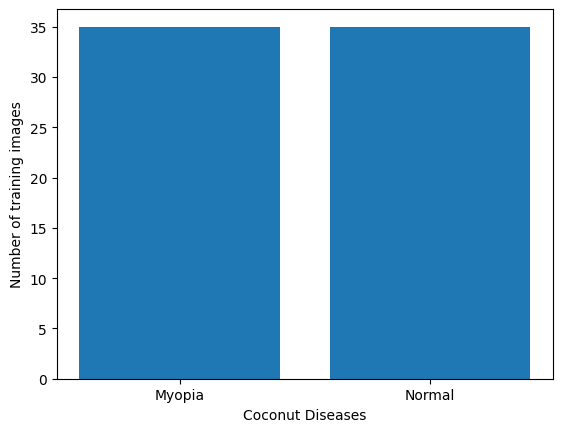

In [8]:
aug_data = {}

for folder in os.listdir(OUTPUT_DIR + 'train/'):
    img_path = OUTPUT_DIR + 'train/' + folder + '/'
    aug_data[folder] = len(os.listdir(img_path))

plt.bar(aug_data.keys(), aug_data.values())
plt.ylabel('Number of training images')
plt.xlabel('Coconut Diseases')
plt.show()